In [90]:
import pandas as pd
import tweepy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import regex
from nltk.tokenize import TweetTokenizer
import datetime
import my_tokens

In [91]:
auth = tweepy.OAuthHandler(my_tokens.API_KEY, my_tokens.API_SECRET)
auth.set_access_token(my_tokens.ACCESS_TOKEN, my_tokens.ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)
client = tweepy.Client(bearer_token=my_tokens.BEARER_TOKEN, consumer_key=my_tokens.API_KEY, consumer_secret=my_tokens.API_SECRET, access_token=my_tokens.ACCESS_TOKEN, access_token_secret=my_tokens.ACCESS_TOKEN_SECRET)

In [92]:
def get_Tweets(filename, query, tweet_field=None, user_field = None, start_date=None, end_date=None):
    
    print(start_date, end_date)
    tweets = tweepy.Paginator(
        client.search_all_tweets, 
        query=query, 
        max_results=500, 
        start_time=start_date, 
        user_fields=user_field, 
        expansions=['author_id','entities.mentions.username'],
        tweet_fields=tweet_field).flatten()

    tweets_for_csv = []
    for tweet in tweets:
        tweets_for_csv.append([tweet.id, tweet.author_id, tweet.source,tweet.created_at, tweet.text.encode("utf-8")])
    outfile = filename + ".csv"
    print("writing to " + outfile)
    with open(outfile, 'w+') as file:
        writer = csv.writer(file, delimiter=',')
        writer.writerows(tweets_for_csv)

In [93]:
def get_user_info(filename, user_ids, user_field=None):

    index = 0
    users_for_csv = []
    while index < len(user_ids):
        uids = user_ids[index : min(index+100, len(user_ids))]
        users = client.get_users(ids=uids, user_fields=user_field)
        for user in users.data:
            users_for_csv.append([user.id, user.created_at ,user.name, user.username, user.verified, user.protected, user.public_metrics['followers_count'], user.public_metrics['following_count'], user.public_metrics['tweet_count']])
        index += 100

    outfile = filename + ".csv"
    print("writing to " + outfile)
    with open(outfile, 'w+') as file:
        writer = csv.writer(file, delimiter=',')
        writer.writerows(users_for_csv)


In [94]:
def get_timeline(filename, ids, tweet_field=None):

    user_timeline = []
    for idx in ids:
        tweets = tweepy.Paginator(
            client.get_users_tweets,
            id=idx, 
            max_results=100, 
            tweet_fields=tweet_field,
            expansions=['referenced_tweets.id'],
            exclude=['retweets'],
            limit = 2)
        for t in tweets:
            if t.data:
                for tweet in t.data:
                    user_timeline.append([idx, tweet.source, tweet.created_at, tweet.text.encode("utf-8"), tweet.public_metrics['like_count'], tweet.public_metrics['retweet_count']])
    outfile = filename + ".csv"
    print("writing to " + outfile)
    with open(outfile, 'w+') as file:
        writer = csv.writer(file, delimiter=',')
        writer.writerows(user_timeline)



In [95]:
tt = TweetTokenizer()
def tokenize(text):
    lst = tt.tokenize(text)
    return lst

In [96]:
def get_count(lst):
    cnt = 0
    for x in [s.lower() for s in lst]:
        if x == '#indiaout':
            cnt+=1
    return cnt

In [97]:
# get_Tweets(
#     filename='indiaout_2mnths',
#     query='#indiaout lang:en', 
#     tweet_field=['created_at','author_id','source'], 
#     user_field=['username','verified','created_at'], 
#     start_date=datetime.datetime(2022,4,1),
#     end_date=datetime.datetime(2022,6,1))

In [98]:
# tweet.id, tweet.author_id, tweet.source,tweet.created_at, tweet.text
data = pd.read_csv('indiaout_2mnths.csv', names=['id', 'author_id', 'source', 'created_at', 'text'], parse_dates=['created_at'])

In [99]:
data

,id,author_id,source,created_at,text
0,1533115254548221952,794284672771588096,Twitter for Android,2022-06-04 15:55:35+00:00,b'RT @ZainAbdYameen: Believe me @nuhaa_aaa ! W...
1,1533112961874546688,110484976,Twitter Web App,2022-06-04 15:46:28+00:00,b'RT @TakeeTakei: India is influencing Maldive...
2,1533111544791576576,554592214,Twitter for iPhone,2022-06-04 15:40:50+00:00,"b'RT @RukumaA: Detained handcuffed, taken to c..."
3,1533111275466543106,1234499434949435392,Twitter for iPhone,2022-06-04 15:39:46+00:00,b'RT @xdiffyx: Free them Now! #IndiaOut #Maldi...
4,1533110938202566657,1234499434949435392,Twitter for iPhone,2022-06-04 15:38:26+00:00,b'RT @TakeeTakei: Free @nuhaa_aaa!\n#IndiaOut\...
...,...,...,...,...,...
45428,1509724549256216576,854534342,Twitter for Android,2022-04-01 02:49:16+00:00,b'RT @nuhaa_aaa: Retweet if you agree that the...
45429,1509724096485023746,1339897708862205952,Twitter for Android,2022-04-01 02:47:28+00:00,b'RT @nuhaa_aaa: Retweet if you agree that the...
45430,1509718256180899860,891519186937069568,Twitter for Android,2022-04-01 02:24:16+00:00,b'RT @King_Cen12: Free @TakaneyOfficial Now!\n...
45431,1509718236585111552,891519186937069568,Twitter for Android,2022-04-01 02:24:11+00:00,b'RT @nuhaa_aaa: Retweet if you agree that the...


In [100]:
data.tail()

,id,author_id,source,created_at,text
45428,1509724549256216576,854534342,Twitter for Android,2022-04-01 02:49:16+00:00,b'RT @nuhaa_aaa: Retweet if you agree that the...
45429,1509724096485023746,1339897708862205952,Twitter for Android,2022-04-01 02:47:28+00:00,b'RT @nuhaa_aaa: Retweet if you agree that the...
45430,1509718256180899860,891519186937069568,Twitter for Android,2022-04-01 02:24:16+00:00,b'RT @King_Cen12: Free @TakaneyOfficial Now!\n...
45431,1509718236585111552,891519186937069568,Twitter for Android,2022-04-01 02:24:11+00:00,b'RT @nuhaa_aaa: Retweet if you agree that the...
45432,1509713858294091777,1106369769039519744,Twitter for Android,2022-04-01 02:06:47+00:00,b'RT @ProgressPartyMV: Free PPM Youth Member A...


In [101]:
len(data['author_id'].unique())

3098

In [102]:
data['author_id'].value_counts()

3018834116             2593
1202282883722838016    1450
1510409342415441922    1359
1108109108463329281    1328
1203616533546774528    1267
                       ... 
1452355622482026496       1
1242758711740755970       1
875069310720516096        1
3187270008                1
1446505004211347457       1
Name: author_id, Length: 3098, dtype: int64

In [124]:
data.dtypes

id                          int64
author_id                   int64
source                     object
created_at    datetime64[ns, UTC]
text                       object
dtype: object

In [152]:
data['created_at'].dt.date.value_counts()

2022-05-06    2949
2022-05-07    2694
2022-05-27    2393
2022-05-20    2128
2022-05-18    1933
              ... 
2022-04-05      42
2022-04-02      42
2022-04-06      38
2022-04-09      37
2022-04-04      32
Name: created_at, Length: 65, dtype: int64

<AxesSubplot:>

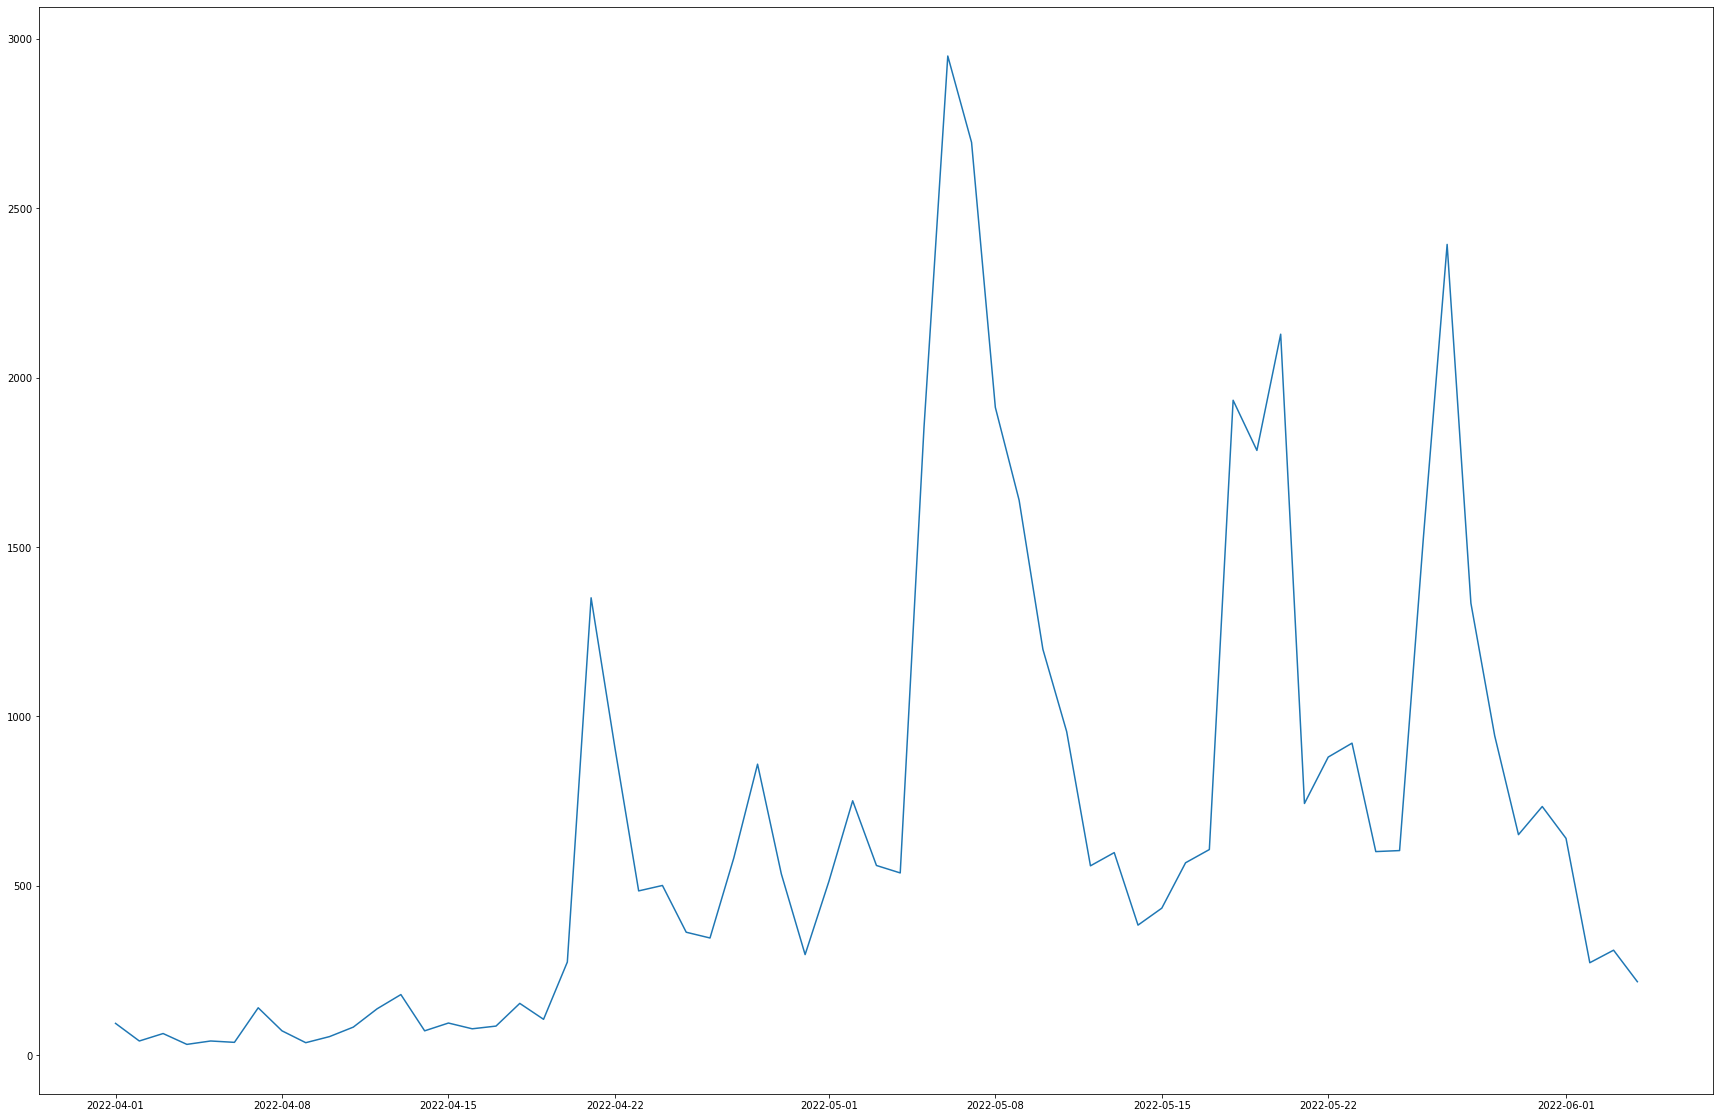

In [154]:
plt.figure(figsize=(30,20))
sns.lineplot(x=data['created_at'].dt.date.value_counts().index, y=data['created_at'].dt.date.value_counts().values)

In [75]:
author_list_tweet_cnt = []
threshold = 5
for author_id,val in zip(data['author_id'].value_counts().index, data['author_id'].value_counts().values):
    if(val > threshold):
        author_list_tweet_cnt.append(author_id)

In [76]:
len(author_list_tweet_cnt)

607

In [77]:
data['text_tokens'] = data['text'].apply(tokenize)

In [78]:
data['#indiaout_cnt'] = data['text_tokens'].apply(get_count)

In [79]:
print(data['#indiaout_cnt'].value_counts())
print(data['#indiaout_cnt'].max(), data['#indiaout_cnt'].min())

1     29744
0     14847
2       634
3       166
6        15
5        10
4         5
8         4
10        3
9         2
23        1
7         1
12        1
Name: #indiaout_cnt, dtype: int64
23 0


In [80]:
authors_list_hashtag_cnt = []
threshold = 2
for i in range(data.shape[0]):
    if data['#indiaout_cnt'][i] > threshold:
        authors_list_hashtag_cnt.append(data['author_id'][i])

In [81]:
len(authors_list_hashtag_cnt)

208

In [82]:
cnt = 0
for author in authors_list_hashtag_cnt:
    if author not in author_list_tweet_cnt:
        author_list_tweet_cnt.append(author)
        cnt+=1
print(cnt)

11


In [83]:
len(author_list_tweet_cnt)

618

In [23]:
# get_user_info(filename='authors_info', user_ids=author_list_tweet_cnt, user_field=['created_at','protected','verified', 'public_metrics'])

In [24]:
#user.id, user.created_at ,user.name, user.username, user.verified, user.protected
authors = pd.read_csv('authors_info.csv', parse_dates=['created_at'])

In [25]:
authors.head()

,Unnamed: 0,id,created_at,name,username,verified,protected,followers,following,tweets_count
0,0,3018834116,2015-02-13 20:25:43+00:00,Ahmadh,AhmadhMV,False,False,6412,2127,110086
1,1,1202282883722838016,2019-12-04 17:46:01+00:00,shahilmueen,shahilmueenn,False,False,1123,87,35261
2,2,1510409342415441922,2022-04-03 00:11:21+00:00,Shamoon (Sun Pudin),Apudinshammu,False,False,162,406,12022
3,3,1108109108463329281,2019-03-19 20:52:53+00:00,Shamoon ( Sun Pudin ),Shamoon511,False,False,716,608,9314
4,4,1203616533546774528,2019-12-08 10:05:26+00:00,ZeIn,zein_zenin,False,False,1661,891,48975


In [26]:
authors['verified'].value_counts()

False    608
True       9
Name: verified, dtype: int64

In [27]:
authors['protected'].value_counts()

False    617
Name: protected, dtype: int64

In [28]:
authors[(authors['verified'] == False) & (authors['protected'] == False)].shape

(608, 10)

In [29]:
# get_timeline('authors_timeline', author_list_tweet_cnt, ['created_at', 'public_metrics', 'source'])

In [46]:
# idx, tweet.source, tweet.created_at, tweet.text.encode("utf-8"), tweet.public_metrics['like_count'], tweet.public_metrics['retweet_count']
timelines = pd.read_csv('authors_timeline.csv', parse_dates=['tweet_time'])

In [47]:
len(timelines['author_id'].unique())

586

In [48]:
timelines['author_id'].value_counts()

960914677935915008     200
1229620336074936320    200
1254703060842016772    200
1423329365916413952    200
1365374884918874112    200
                      ... 
1425170778312429568      1
69655471                 1
1400347284752064513      1
775217961187454976       1
424744271                1
Name: author_id, Length: 586, dtype: int64

In [49]:
val10 = 0
val50 = 0
val100 = 0
for value in timelines['author_id'].value_counts().values:
    if value < 100:
        val100+=1
    if value < 50:
        val50+=1
    if value < 10:
        val10+=1
print(val100, val50, val10)

360 236 65


In [50]:
timelines.head()

,author_id,source,tweet_time,text,likes,retweet
0,3018834116,Twitter for Android,2022-06-07 18:29:55+00:00,b'#IndiaOut https://t.co/uhYvSSlIPj',20,16
1,3018834116,Twitter for Android,2022-06-07 05:30:31+00:00,b'The enemy of Islam.\n@ibusolih @MohamedNashe...,13,11
2,3018834116,Twitter for Android,2022-06-06 17:44:01+00:00,b'\xd8\xa7\xd9\x84\xd9\x84\xd9\x87\xd9\x85 \xd...,2,1
3,3018834116,Twitter for Android,2022-06-06 17:07:45+00:00,b'\xde\x84\xde\xa7\xde\x8c\xde\xa8\xde\x8d\xde...,22,12
4,3018834116,Twitter for Android,2022-06-06 15:26:09+00:00,b'#\xd8\xa5\xd9\x84\xd8\xa7_\xd8\xb1\xd8\xb3\x...,2,2


In [35]:
timelines['source'].value_counts()

Twitter for Android     29557
Twitter for iPhone      22513
Twitter Web App          5016
Twitter for iPad          389
fllwrs                    304
Instagram                 196
IFTTT                     143
Flamingo for Android       83
FenixApp                   71
4k Planet Stream           44
TweetDeck                   7
Twitter Media Studio        3
Tweepsmap                   3
Postcron App                3
Revue                       2
Tweetails                   1
TwiAgeCom                   1
Name: source, dtype: int64

<AxesSubplot:xlabel='tweet_time', ylabel='author_id'>

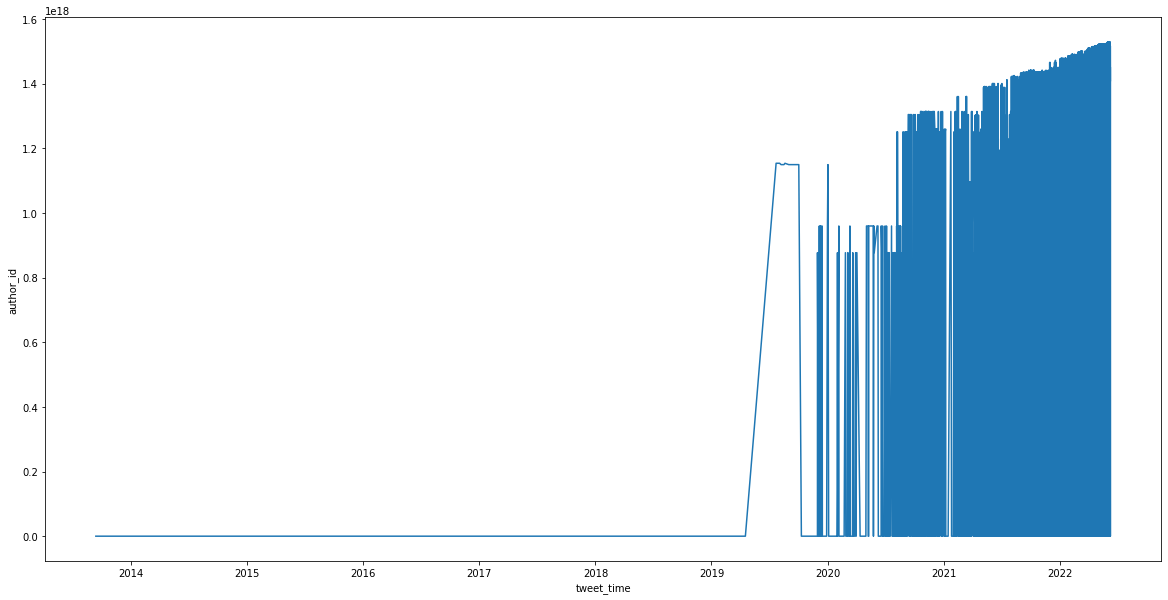

In [51]:
plt.figure(figsize=(20,10))
sns.lineplot(data=timelines, x='tweet_time', y='author_id')

In [37]:
timelines['tweet_time'].value_counts()

2022-06-03 03:30:01+00:00    6
2022-05-23 21:04:47+00:00    5
2021-11-21 07:34:49+00:00    3
2021-06-06 20:13:57+00:00    3
2021-12-23 10:00:17+00:00    3
                            ..
2022-06-06 19:55:30+00:00    1
2022-06-06 19:55:19+00:00    1
2022-06-06 19:54:36+00:00    1
2022-06-06 19:54:08+00:00    1
2022-06-05 16:38:56+00:00    1
Name: tweet_time, Length: 57711, dtype: int64

In [57]:
no_data_authors = []
data_authors = list(timelines['author_id'].values)
for aid in author_list_tweet_cnt:
    if aid not in data_authors:
        no_data_authors.append(aid)

In [60]:
no_data_authors

[752023088254955521,
 2170771542,
 1388060366475698179,
 705037961159507968,
 271281730,
 2908404438,
 1510756104283705346,
 1394904101780017153,
 1371806451283357701,
 1390775981770567680,
 1524500162013446146,
 1368988991899410433,
 1472908594534240256,
 1471834178580729859,
 1284148617104646144,
 1387787607568904199,
 1388173679108923395,
 2254772288,
 1388187073975259138,
 1521881521182760961,
 1926571112,
 1393800141165924353,
 3103761517,
 1394231649294983168,
 1504101797652463617,
 1387779589758455812,
 1399033728,
 3103931990,
 2849520678,
 1428792660370739203,
 1523303002362155008,
 1306177628991356928]